## Predicting The alpha signal Using MicroBlogging Data

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Train Data

In [2]:
data = pd.read_csv("train_factors-1573207730757.csv",header = 0)

### Importing JSON Data

In [3]:
import json
from pandas.io.json import json_normalize
with open('train_data-1573118738755.json') as f:
    d = json.load(f)
json1 = json_normalize(d['records'])
json1.head(5)

json1.to_csv('json1.csv',index=False)

In [4]:
json_data = pd.read_csv("json1.csv",header =0)

In [5]:
pd.set_option('display.max_colwidth',-1)
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,$AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$AMD
1,@inforlong @MariaGascon Despite\nChina trade war $CAT held very well 👍,3,2018-10-09 03:51:06+00:00,$CAT
2,$AVGO WTF?,2,2018-07-12 13:35:32+00:00,$AVGO
3,$PH\n New Insider Filing On: \n MULLER KLAUS PETER\nTransaction Code: \n http://www.filingscanner.com/Alerts/PH.php,2,2018-07-19 03:32:50+00:00,$PH
4,$FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$FB


### Preprocessing and Visualization on Train data JSON File

In [6]:
json_data.stocktwit_tweet = json_data.stocktwit_tweet.apply(lambda x:str(x))

In [7]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,$AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$AMD
1,@inforlong @MariaGascon Despite\nChina trade war $CAT held very well 👍,3,2018-10-09 03:51:06+00:00,$CAT
2,$AVGO WTF?,2,2018-07-12 13:35:32+00:00,$AVGO
3,$PH\n New Insider Filing On: \n MULLER KLAUS PETER\nTransaction Code: \n http://www.filingscanner.com/Alerts/PH.php,2,2018-07-19 03:32:50+00:00,$PH
4,$FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$FB


In [8]:
json_data['stocktwit_tweet'] = json_data['stocktwit_tweet'].str.replace('http\S*',"",case=False)
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,$AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$AMD
1,@inforlong @MariaGascon Despite\nChina trade war $CAT held very well 👍,3,2018-10-09 03:51:06+00:00,$CAT
2,$AVGO WTF?,2,2018-07-12 13:35:32+00:00,$AVGO
3,$PH\n New Insider Filing On: \n MULLER KLAUS PETER\nTransaction Code: \n,2,2018-07-19 03:32:50+00:00,$PH
4,$FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$FB


In [9]:
json_data.stocktwit_tweet = json_data.stocktwit_tweet.str.replace(r'\\\w{3}',"")

In [10]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,$AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$AMD
1,@inforlong @MariaGascon Despite\nChina trade war $CAT held very well 👍,3,2018-10-09 03:51:06+00:00,$CAT
2,$AVGO WTF?,2,2018-07-12 13:35:32+00:00,$AVGO
3,$PH\n New Insider Filing On: \n MULLER KLAUS PETER\nTransaction Code: \n,2,2018-07-19 03:32:50+00:00,$PH
4,$FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$FB


In [11]:
json_data.stocktwit_tweet = json_data.stocktwit_tweet.str.replace("[^a-zA-Z#]", " ")
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$AMD
1,inforlong MariaGascon Despite China trade war CAT held very well,3,2018-10-09 03:51:06+00:00,$CAT
2,AVGO WTF,2,2018-07-12 13:35:32+00:00,$AVGO
3,PH New Insider Filing On MULLER KLAUS PETER Transaction Code,2,2018-07-19 03:32:50+00:00,$PH
4,FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$FB


In [12]:
json_data.isnull().sum()

stocktwit_tweet    0
sentiment_score    0
timestamp          0
ticker             0
dtype: int64

In [13]:
json_data['ticker'] = json_data['ticker'].str.lower()

In [14]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
0,AMD going up but hesitating however chart is very stable and going upward,3,2018-09-19 18:38:28+00:00,$amd
1,inforlong MariaGascon Despite China trade war CAT held very well,3,2018-10-09 03:51:06+00:00,$cat
2,AVGO WTF,2,2018-07-12 13:35:32+00:00,$avgo
3,PH New Insider Filing On MULLER KLAUS PETER Transaction Code,2,2018-07-19 03:32:50+00:00,$ph
4,FB if it bounces tommorrow do the right thing and GTFO,3,2018-08-23 19:07:54+00:00,$fb


### Countplot to see the sentiment score

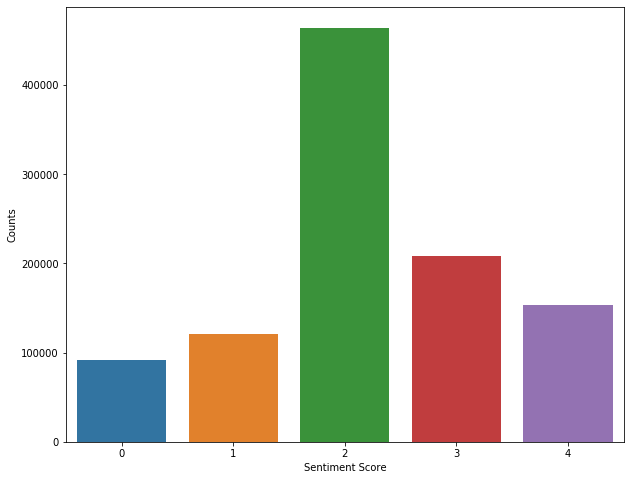

In [15]:
plt.figure(figsize=(10,8))
sns.countplot("sentiment_score",data = json_data)
plt.xlabel("Sentiment Score")
plt.ylabel("Counts")
plt.show()

In [16]:
json_data = json_data.sort_values(by=['ticker','timestamp'])

In [17]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
14803,AAPL Some sort of expected resistance at,1,2018-08-02 14:35:42+00:00,$$aapl
759936,davidcastelli WAY GO I M a AAPL FAN GO TRILLION,2,2018-08-02 17:12:59+00:00,$$aapl
382208,Learnstocks You did attach AAPL chart instead of TSLA,2,2018-08-02 20:32:16+00:00,$$aapl
352716,macro economics AAPL AMZN My Portfolio,2,2018-08-02 21:59:03+00:00,$$aapl
527130,StayAtHomeTrader findim pippyRN Ever Try investing in AAPL amp AMZN Nice ROI,3,2018-08-06 01:28:00+00:00,$$aapl


In [18]:
json_data['ticker'] = json_data['ticker'].str.replace("$","")
json_data['stocktwit_tweet']=json_data['stocktwit_tweet'].str.replace("$","")

In [19]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker
14803,AAPL Some sort of expected resistance at,1,2018-08-02 14:35:42+00:00,aapl
759936,davidcastelli WAY GO I M a AAPL FAN GO TRILLION,2,2018-08-02 17:12:59+00:00,aapl
382208,Learnstocks You did attach AAPL chart instead of TSLA,2,2018-08-02 20:32:16+00:00,aapl
352716,macro economics AAPL AMZN My Portfolio,2,2018-08-02 21:59:03+00:00,aapl
527130,StayAtHomeTrader findim pippyRN Ever Try investing in AAPL amp AMZN Nice ROI,3,2018-08-06 01:28:00+00:00,aapl


In [20]:
json_data['date'] = pd.to_datetime(json_data['timestamp']).dt.date
json_data['time'] = pd.to_datetime(json_data['timestamp']).dt.time

In [21]:
json_data.head()

,stocktwit_tweet,sentiment_score,timestamp,ticker,date,time
14803,AAPL Some sort of expected resistance at,1,2018-08-02 14:35:42+00:00,aapl,2018-08-02,14:35:42
759936,davidcastelli WAY GO I M a AAPL FAN GO TRILLION,2,2018-08-02 17:12:59+00:00,aapl,2018-08-02,17:12:59
382208,Learnstocks You did attach AAPL chart instead of TSLA,2,2018-08-02 20:32:16+00:00,aapl,2018-08-02,20:32:16
352716,macro economics AAPL AMZN My Portfolio,2,2018-08-02 21:59:03+00:00,aapl,2018-08-02,21:59:03
527130,StayAtHomeTrader findim pippyRN Ever Try investing in AAPL amp AMZN Nice ROI,3,2018-08-06 01:28:00+00:00,aapl,2018-08-06,01:28:00


In [22]:
json_data.drop(["timestamp"],axis=1,inplace=True)

In [23]:
json_data = json_data.sort_values(by=["ticker","date"])

In [24]:
json_data.head()

,stocktwit_tweet,sentiment_score,ticker,date,time
520339,A Market Positioning is Very Underweight CrowdThnk # s Algo forecasts chance Moving Higher,2,a,2018-07-03,21:40:47
780362,short interest ratio of A is at and short to float is via sunshineave,0,a,2018-07-04,07:15:37
684345,Here s what Estimize analysts believe A will report for Q revenue Reporting AMC,2,a,2018-07-04,15:12:41
914879,#AgilentTechnologies has a high payout ratio of #A A,2,a,2018-07-05,16:31:34
75734,Short sale volume not short interest for A is via shortvolumes,1,a,2018-07-06,02:01:36


In [25]:
stock_tweet = json_data['stocktwit_tweet'].apply(lambda x: x.split()) 
stock_tweet.head()

520339    [A, Market, Positioning, is, Very, Underweight, CrowdThnk, #, s, Algo, forecasts, chance, Moving, Higher]
780362    [short, interest, ratio, of, A, is, at, and, short, to, float, is, via, sunshineave]                     
684345    [Here, s, what, Estimize, analysts, believe, A, will, report, for, Q, revenue, Reporting, AMC]           
914879    [#AgilentTechnologies, has, a, high, payout, ratio, of, #A, A]                                           
75734     [Short, sale, volume, not, short, interest, for, A, is, via, shortvolumes]                               
Name: stocktwit_tweet, dtype: object

In [26]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stock_tweet = stock_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

### WordCloud plot to see all the words contained in the tweets

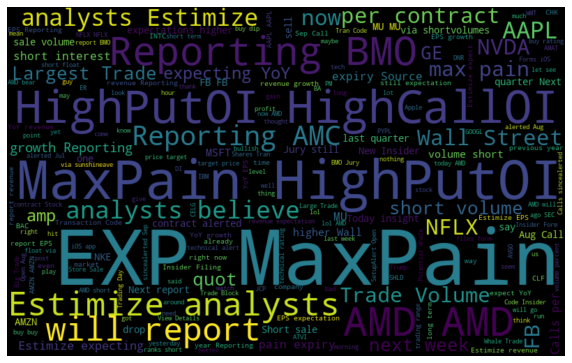

In [27]:
all_words = ' '.join([text for text in json_data['stocktwit_tweet']])
import wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Words with sentiment score 0

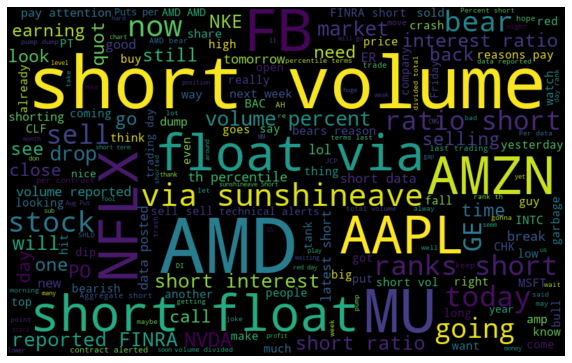

In [28]:
word_ss_0 = ' '.join([text for text in json_data['stocktwit_tweet'][json_data['sentiment_score'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(word_ss_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Words with sentiment score 1

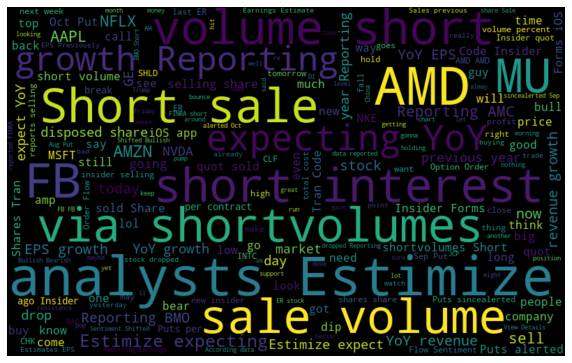

In [29]:
word_ss_1 =' '.join([text for text in json_data['stocktwit_tweet'][json_data['sentiment_score']== 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_ss_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() 

### Words with sentiment score 2

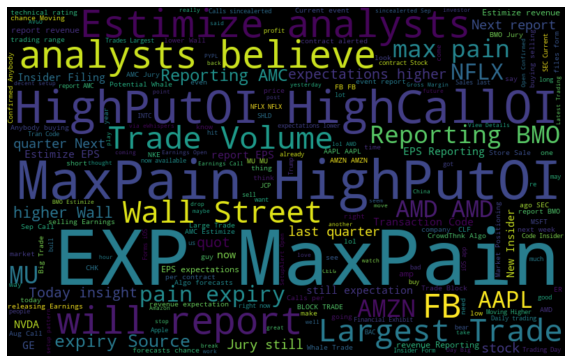

In [30]:
word_ss_2 =' '.join([text for text in json_data['stocktwit_tweet'][json_data['sentiment_score']== 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_ss_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() 

### Words with sentiment score 3

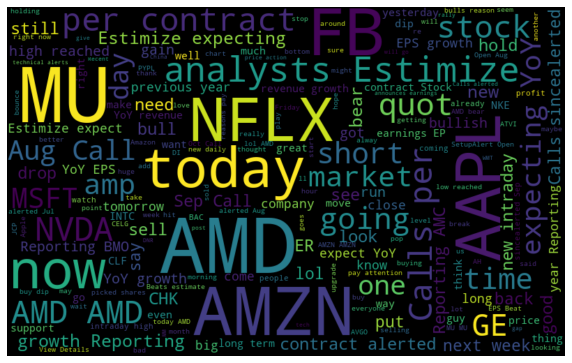

In [31]:
word_ss_3 =' '.join([text for text in json_data['stocktwit_tweet'][json_data['sentiment_score']== 3]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_ss_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() 

### Words with sentiment score 4

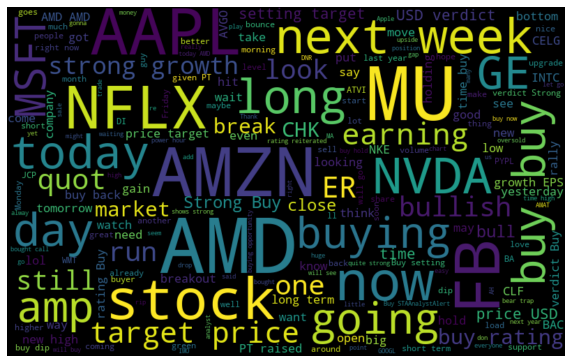

In [32]:
word_ss_4 =' '.join([text for text in json_data['stocktwit_tweet'][json_data['sentiment_score']== 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_ss_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() 

### Preprocessing and Visualization of the Train data CSV File

In [33]:
data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7',
       'alpha'],
      dtype='object')

### Histogram to see the Alpha Distribution

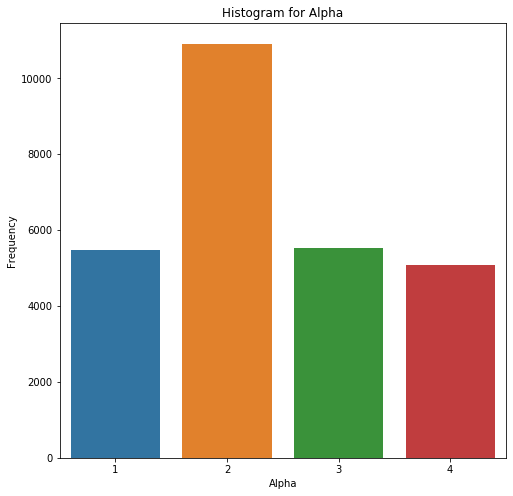

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(data['alpha'])
plt.xlabel("Alpha")
plt.ylabel("Frequency")
plt.title("Histogram for Alpha")
plt.show()

### Histogram of the Anonymous Factors 1-7

#### Distribution of Stock Factor 1

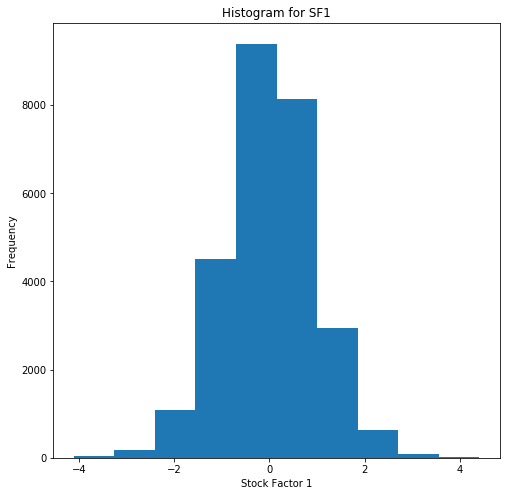

In [35]:
plt.figure(figsize=(8,8))
plt.hist(data['SF1'])
plt.xlabel("Stock Factor 1")
plt.ylabel("Frequency")
plt.title("Histogram for SF1")
plt.show()

#### Distribution of Stock Factor 2

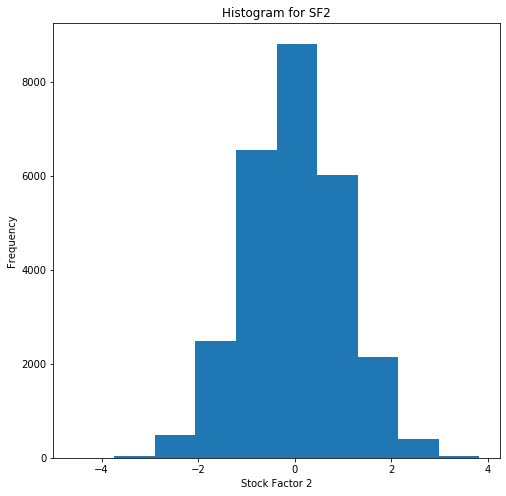

In [36]:
plt.figure(figsize=(8,8))
plt.hist(data['SF2'])
plt.xlabel("Stock Factor 2")
plt.ylabel("Frequency")
plt.title("Histogram for SF2")
plt.show()

#### Distribution of Stock Factor 3

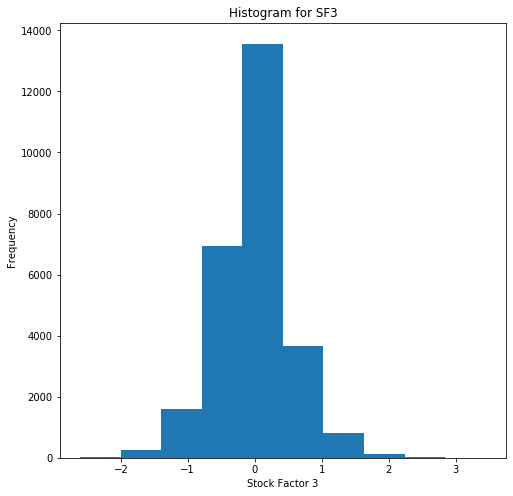

In [37]:
plt.figure(figsize=(8,8))
plt.hist(data['SF3'])
plt.xlabel("Stock Factor 3")
plt.ylabel("Frequency")
plt.title("Histogram for SF3")
plt.show()

#### Distribution of Stock Factor 4

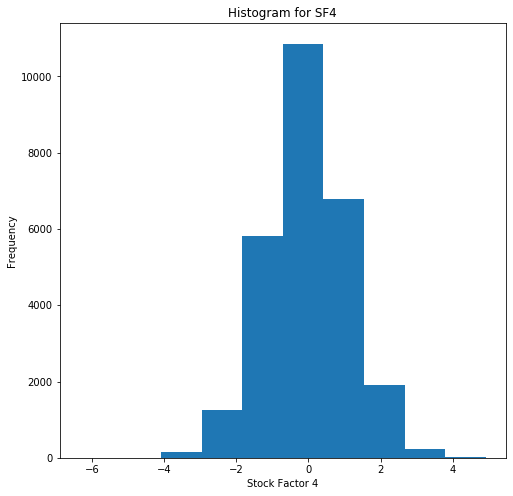

In [38]:
plt.figure(figsize=(8,8))
plt.hist(data['SF4'])
plt.xlabel("Stock Factor 4")
plt.ylabel("Frequency")
plt.title("Histogram for SF4")
plt.show()

#### Distribution of Stock Factor 5

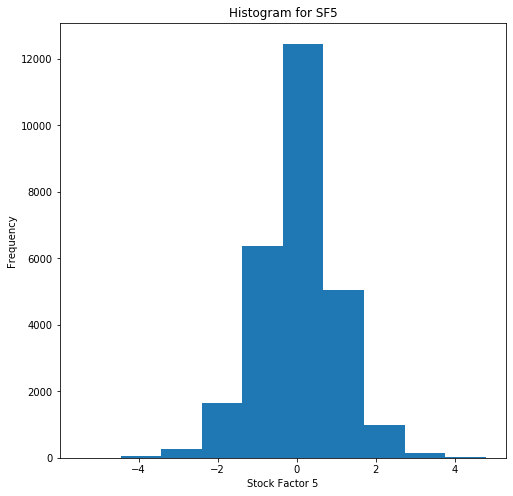

In [39]:
plt.figure(figsize=(8,8))
plt.hist(data['SF5'])
plt.xlabel("Stock Factor 5")
plt.ylabel("Frequency")
plt.title("Histogram for SF5")
plt.show()

#### Distribution of Stock Factor 6

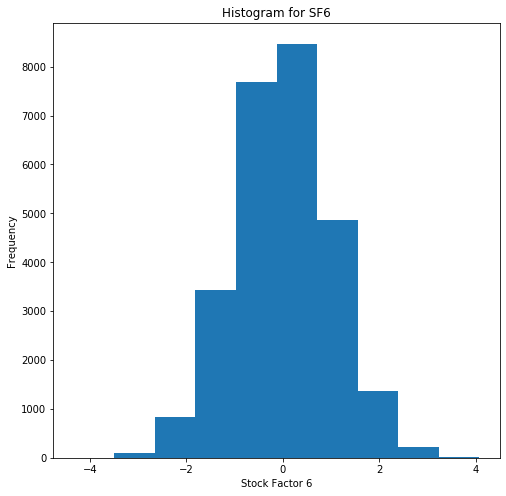

In [40]:
plt.figure(figsize=(8,8))
plt.hist(data['SF6'])
plt.xlabel("Stock Factor 6")
plt.ylabel("Frequency")
plt.title("Histogram for SF6")
plt.show()

#### Distribution of Stock Factor 7

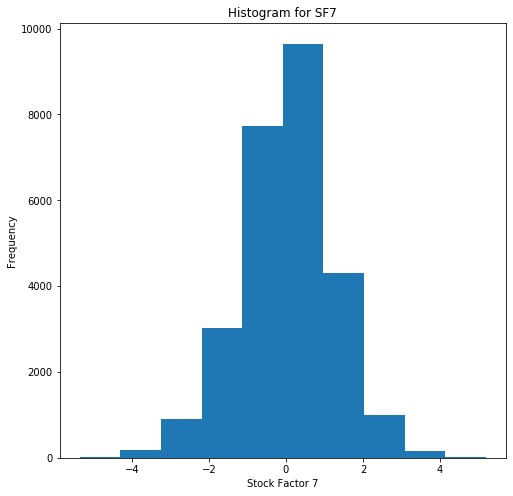

In [41]:
plt.figure(figsize=(8,8))
plt.hist(data['SF7'])
plt.xlabel("Stock Factor 7")
plt.ylabel("Frequency")
plt.title("Histogram for SF7")
plt.show()

### Correlation plot of all the variables in the train data

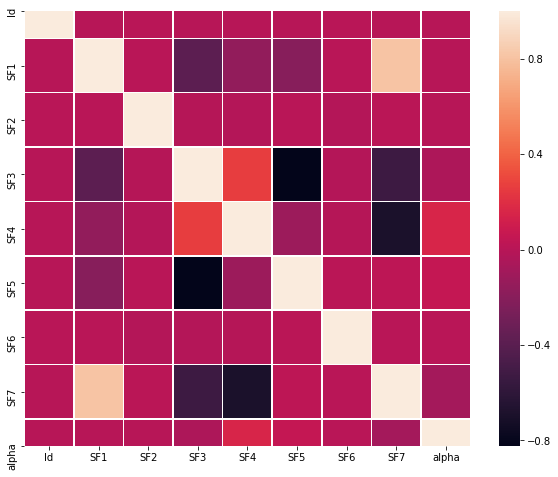

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False,linewidth=0.5)
plt.show()

In [43]:
data['ticker']=data['ticker'].str.replace("$","")

In [44]:
data['date'] = pd.to_datetime(data['date'].astype('str'),format="%d/%m/%y")

In [45]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-07-10,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-09-12,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [46]:
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month
data['day'] = pd.to_datetime(data['date']).dt.day

In [47]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,year,month,day
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,2018,8,21
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,2018,10,11
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,2018,8,21
3,4,2018-07-10,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,2018,7,10
4,5,2018-09-12,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,2018,9,12


In [48]:
data.drop(['date'],axis=1,inplace=True)

### Behavior of the alpha signal with Anonymous Factors SF 1-7

#### Change in alpha with Stock Factor 1

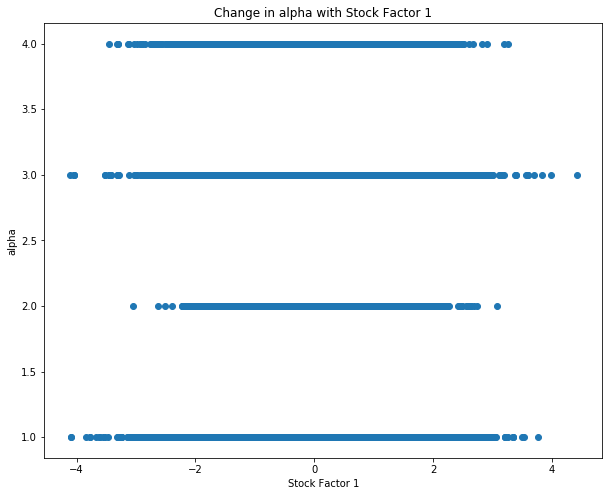

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF1'],data['alpha'])
plt.xlabel("Stock Factor 1")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 1")
plt.show()

#### Change in alpha with Stock Factor 2

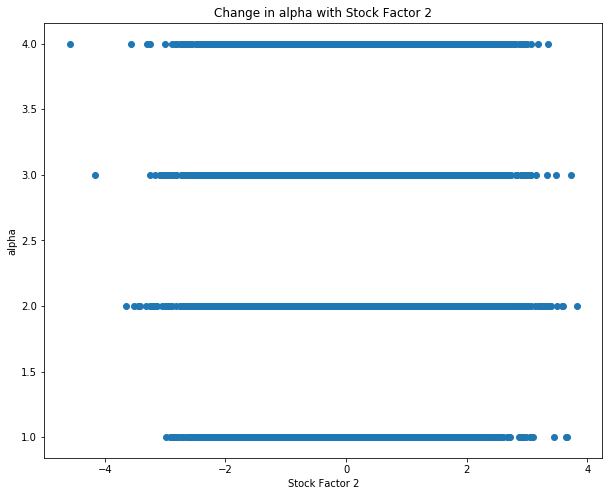

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF2'],data['alpha'])
plt.xlabel("Stock Factor 2")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 2")
plt.show()

#### Change in alpha with Stock Factor 3

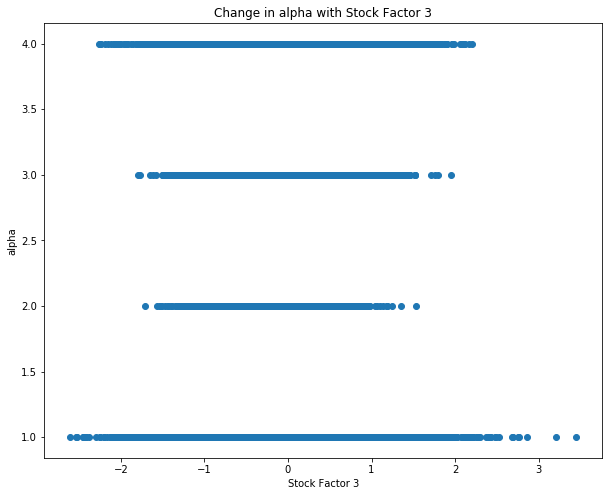

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF3'],data['alpha'])
plt.xlabel("Stock Factor 3")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 3")
plt.show()

#### Change in alpha with Stock Factor 4

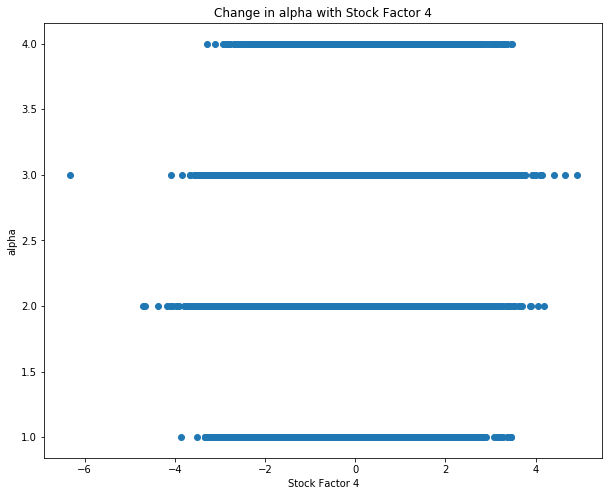

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF4'],data['alpha'])
plt.xlabel("Stock Factor 4")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 4")
plt.show()

#### Change in alpha with Stock Factor 5

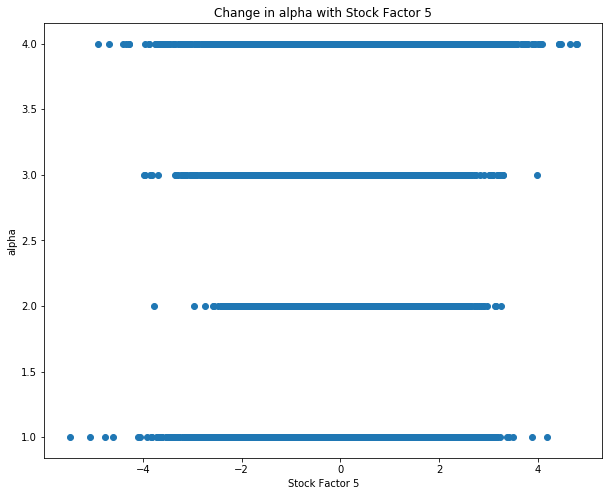

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF5'],data['alpha'])
plt.xlabel("Stock Factor 5")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 5")
plt.show()

#### Change in alpha with Stock Factor 6

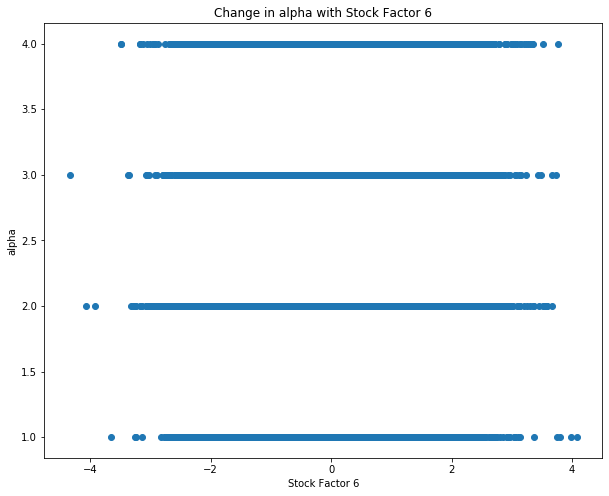

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF6'],data['alpha'])
plt.xlabel("Stock Factor 6")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 6")
plt.show()

#### Change in alpha with Stock Factor 7

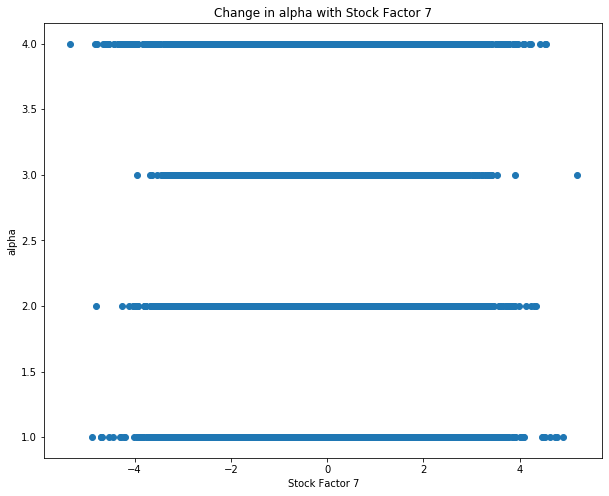

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(data['SF7'],data['alpha'])
plt.xlabel("Stock Factor 7")
plt.ylabel("alpha")
plt.title("Change in alpha with Stock Factor 7")
plt.show()